# Activité : Classement automatique de feuilles d'arbre

### Préparation des données

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC

In [4]:
def CourbeVisualisation(Abscisse,Ordonnee,Maximum,indexOptimum,Titre):
    plt.figure(figsize=(10,10))
    plt.title(Titre)
    plt.plot(Abscisse.loc[0:99],Ordonnee.loc[0:99], color='red',label = 'Noyau Linéaire')
    plt.plot(Abscisse.loc[100:199],Ordonnee.loc[100:199], color='green',label = 'Noyau rbf')
    plt.plot(Abscisse.loc[200:299],Ordonnee.loc[200:299], color='purple',label = 'Noyau sigmoïde')
    plt.legend(loc = 'lower right')
    plt.plot([0, 300], [Maximum, Maximum],linestyle='--')
    plt.axis('tight')
    plt.plot([indexOptimum, indexOptimum], [0, 1],linestyle='--')
    plt.ylabel('Score de la classification')
    plt.xlabel('Combinaison des paramètres Coefficient - Degré - Noyau')
    plt.show()

In [5]:
#Imporation des données
raw_data = pd.read_csv("E:/Data/RawData/Dataset_feuilles_1.csv")
#Encodage des données
labelencoder=LabelEncoder()
Espece = raw_data.iloc[:,1]
Proprietes = raw_data.iloc[:,2:raw_data.shape[1]]
Espece = labelencoder.fit_transform(Espece)
#Création des datasets
Features_train, Features_test, Label_train, Label_test = train_test_split(Proprietes, Espece, test_size=0.33)

In [6]:
#Préparation des paramètres
DegreePlage = np.arange(0,10,1)
CoefficientPlage = np.arange(0,10,1)
TypeKernel = ["linear","rbf","sigmoid"]
resultats = pd.DataFrame([[0,0]])

### Classification de type One versus All

In [7]:
#Calcul des scores pour les différentes combinaisons de paramètres 
for indiceKernel in TypeKernel:
    for indicePlage in CoefficientPlage:
        for indiceDegre in DegreePlage:
            Classification_OVR = OneVsRestClassifier(SVC(C=indicePlage+1,kernel=indiceKernel,degree=indiceDegre,probability =True,max_iter=-1))
            Classification_OVR.fit(Features_train,Label_train)            
            Abscisse = (TypeKernel.index(indiceKernel)*100) + (indicePlage*10) + (indiceDegre*1)
            result=pd.DataFrame([[Abscisse,Classification_OVR.score(Features_test,Label_test)]])
            resultats = resultats.append(result,ignore_index=True)

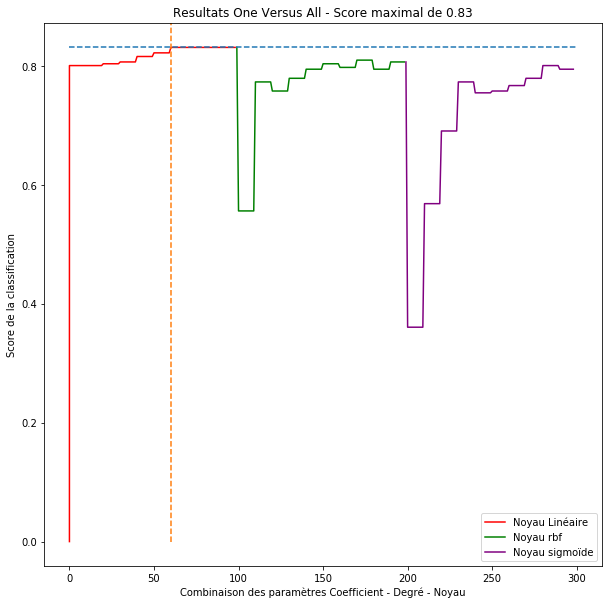

In [8]:
#Affichage des résultats sous forme de courbe multi catégorie
Titre = 'Resultats One Versus All - Score maximal de %0.2f'%resultats[1].max()
AbscisseOptimum = resultats.at[(np.where(resultats[1] >= resultats[1].max()))[0][0],0]
CourbeVisualisation(resultats[0],resultats[1],resultats[1].max(),AbscisseOptimum,Titre) 

In [9]:
# Le meilleur score pour la classification One versus All est obtenu avec les combinaisons de paramètres suivants :
      # Noyau linéaire
      # Coefficient de 5
      # Degré compris entre 1 et 9

### Classification de type One versus One

In [16]:
#Initialisation des paramètres pour la classification OVO
DegreePlage = np.arange(0,10,1)
CoefficientPlage = np.arange(10,40,1)
TypeKernel = ["linear"]#,"rbf","sigmoid"]
resultats = pd.DataFrame([[0,0]])


In [17]:
#Calcul des scores pour les différentes combinaisons de paramètres 
for indiceKernel in TypeKernel:
    for indicePlage in CoefficientPlage:    
        Classification_OVO = OneVsOneClassifier(SVC(C=indicePlage+1,kernel=indiceKernel,degree=indiceDegre,probability =True,max_iter=-1))
        Classification_OVO.fit(Features_train,Label_train)
        Score = Classification_OVO.score(Features_test,Label_test)
        for indiceDegre in DegreePlage:
            Abscisse = (TypeKernel.index(indiceKernel)*100) + ((indicePlage-10)*10) + (indiceDegre*1)
            result=pd.DataFrame([[Abscisse,Score]])
            resultats = resultats.append(result,ignore_index=True)


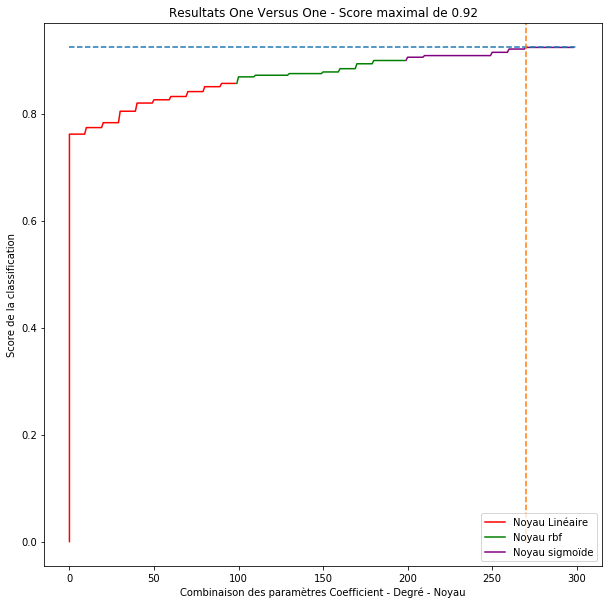

In [19]:
# Affichage des résultats pour classification OVO
Titre = 'Resultats One Versus One - Score maximal de %0.2f'%resultats[1].max()
AbscisseOptimum = resultats.at[(np.where(resultats[1] >= resultats[1].max()))[0][0],0]
CourbeVisualisation(resultats[0],resultats[1],resultats[1].max(),AbscisseOptimum,Titre) 

In [ ]:
# Le meilleur score pour la classification One versus One est obtenu avec les combinaisons de paramètres suivants :
      # Noyau linéaire
      # Coefficient de 27
      # Degré compris entre 1 et 9

### Classification de type Support Vector Machines

In [20]:
#Initialisation des paramètres pour la classification SVM
DegreePlage = np.arange(0,10,1)
CoefficientPlage = np.arange(0.05,0.20,0.01)
TypeKernel = ["l1","l2"]
resultats = pd.DataFrame([[0,0]])

In [22]:
#Calcul des scores pour les différentes combinaisons de paramètres 
for indiceKernel in TypeKernel:
    for indicePlage in CoefficientPlage:   
        
        SVM_MultiClasse = LinearSVC(
                                 C=indicePlage,                                  
                                 intercept_scaling=10, 
                                 verbose=1,
                                 penalty=indiceKernel, 
                                 loss='linge',
                                 multi_class="crammer_singer",
                                 dual=True,
                                 max_iter=100)

        SVM_MultiClasse.fit(Features_train,Label_train)
        Score = SVM_MultiClasse.score(Features_test,Label_test)
        
        for indiceDegre in DegreePlage:
            Abscisse = (TypeKernel.index(indiceKernel)*100) + ((indicePlage)*1000) + (indiceDegre*1)
            result=pd.DataFrame([[Abscisse,Score]])
            resultats = resultats.append(result,ignore_index=True)


[LibLinear]

C:\Users\monne\Anaconda3\lib\site-packages\sklearn\svm\base.py:898: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

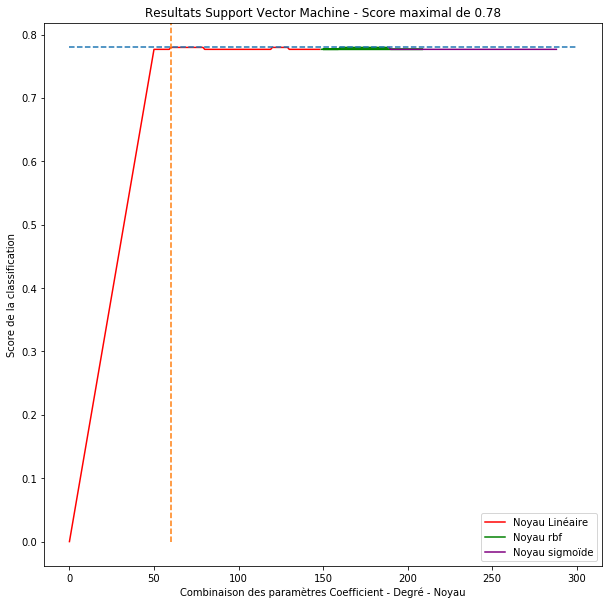

In [23]:
# Affichage des résultats pour classification SVM
Titre = 'Resultats Support Vector Machine - Score maximal de %0.2f'%resultats[1].max()
AbscisseOptimum = resultats.at[(np.where(resultats[1] >= resultats[1].max()))[0][0],0]
CourbeVisualisation(resultats[0],resultats[1],resultats[1].max(),AbscisseOptimum,Titre)            

In [ ]:
# Le meilleur score pour la classification Support Vector Machines est obtenu avec les combinaisons de paramètres suivants :
      # Pénalité de type l1
      # Coefficient C de 0.06
      # Coordonnées d'intersection avec le plan d'origine à 10

### Conclusion - Sélection du meileur modèle

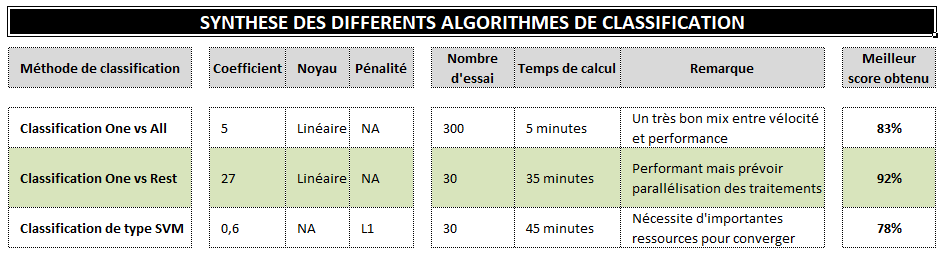

In [25]:
# Le modèle retenu est donc la classification One versus One (comparaison de chaque groupe avec chacun des sous ensembles)
# La performance obtenue est de 92% : sur 300 feuilles d'arbre, l'algorithme réussit à en classer 276 avec succès...
    # On constate néanmoins que l'algorithme est coûteux en ressources de calcul 
    # Idéalement il faudrait pouvoir paralléliser les traitements afin de faire baisser les temps de calcul 
    # Le paramètre Max_Iter permettrait d'effectuer l'opération à condition d'avoir le processeur approprié